In [ ]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
!pip install stop-words

In [ ]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('omw-1.4')
nltk.download('stopwords')
import string
from collections import Counter
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from keras.layers import Bidirectional
from tensorflow.keras.layers import GRU
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

porter_stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))




[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install transformers torch scikit-learn pandas


In [ ]:
file_path = '/content/IMDB Dataset.csv'
df = pd.read_csv(file_path, encoding='utf-8')

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
print("Number of Nulls :")
df.isna().sum()

Number of Nulls :


,0
review,0
sentiment,0


In [ ]:
print("Number of Duplicats :",df.duplicated().sum())
print("Removing Duplicats ......")
df =df.drop_duplicates()
print("Number of Duplicats :",df.duplicated().sum())

Number of Duplicats : 418
Removing Duplicats ......
Number of Duplicats : 0


In [ ]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

<Axes: xlabel='sentiment', ylabel='count'>

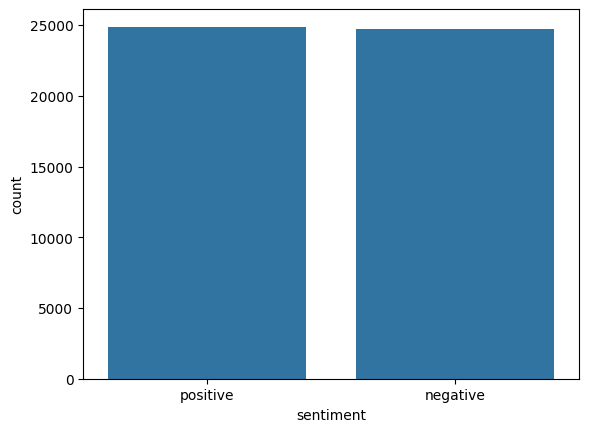

In [ ]:
sns.countplot(x ='sentiment', data = df)

In [ ]:
for i in range(5):
  print(i,df['review'][i])

0 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv', encoding='utf-8')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def preprocess_text(sentence):

    sentence = re.sub(r"https?://\S+|www\.\S+", " ", sentence)


    sentence = re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});", " ", sentence)

    sentence = re.sub(r"[^\w\s]", " ", sentence)

    sentence = re.sub(r"\w*\d\w*", " ", sentence)

    sentence = re.sub(r"[0-9]+", " ", sentence)

    sentence = re.sub(r"\s+", " ", sentence).strip()

    sentence = sentence.lower()

    tokens = []
    for token in sentence.split():
        if token not in stop_words:
            lemmatized_token = lemmatizer.lemmatize(token)
            stemmed_token = stemmer.stem(lemmatized_token)
            tokens.append(stemmed_token)

    return " ".join(tokens)

df['cleaned_review'] = df['review'].apply(preprocess_text)

df.head()


print(df[['review', 'cleaned_review', 'sentiment']].head())


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review sentiment  
0  one review mention watch oz episod hook right ...  positive  
1  wonder littl product film techniqu unassum old...  positive  
2  thought wonder way spend time hot summer weeke...  positive  
3  basic famili littl boy jake think zombi closet...  negative  
4  petter mattei love time money visual stun film...  positive  


In [ ]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


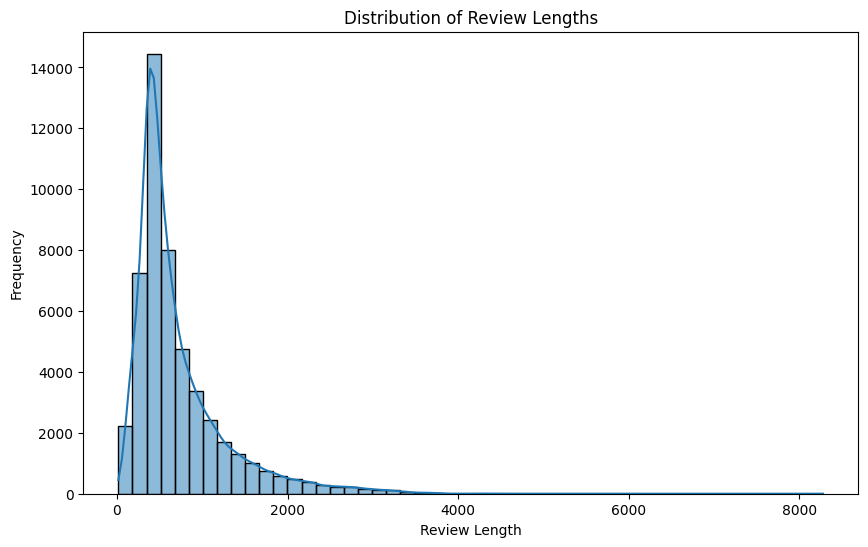

In [ ]:
df['review_length'] = df['cleaned_review'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

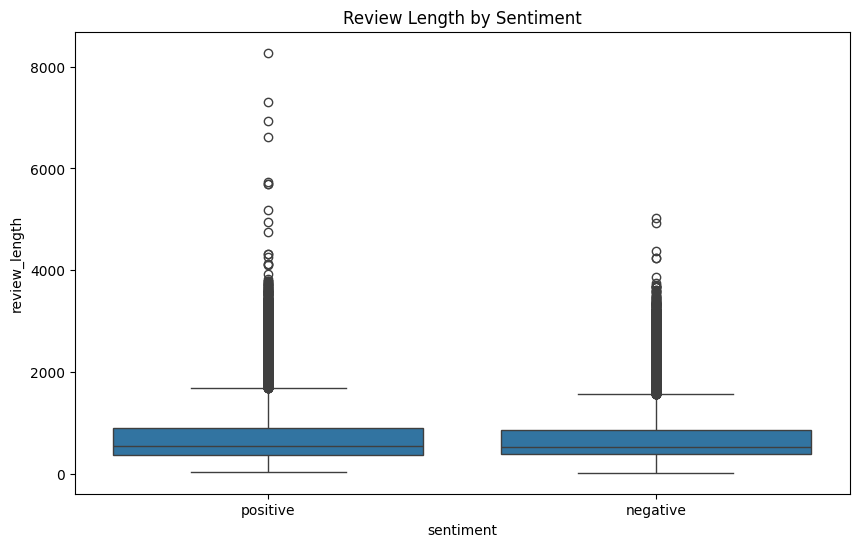

Average review length:
sentiment
negative    703.85028
positive    735.53948
Name: review_length, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title('Review Length by Sentiment')
plt.show()

avg_length = df.groupby('sentiment')['review_length'].mean()
print("Average review length:")
print(avg_length)


In [ ]:
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['cleaned_review'])
feature_names = tfidf.get_feature_names_out()

In [ ]:
positive_tfidf = tfidf_matrix[df['sentiment'] == 'positive'].mean(axis=0)
negative_tfidf = tfidf_matrix[df['sentiment'] == 'negative'].mean(axis=0)

In [ ]:
positive_words = [(word, score) for word, score in zip(feature_names, positive_tfidf.A1)]
negative_words = [(word, score) for word, score in zip(feature_names, negative_tfidf.A1)]

In [ ]:
positive_words.sort(key=lambda x: x[1], reverse=True)
negative_words.sort(key=lambda x: x[1], reverse=True)


In [ ]:
top_positive_words = positive_words[:10]
top_negative_words = negative_words[:10]

print("Top 10 distinctive words for positive reviews:")
print(top_positive_words)
print("\nTop 10 distinctive words for negative reviews:")
print(top_negative_words)

Top 10 distinctive words for positive reviews:
[('film', 0.0838716219851972), ('movi', 0.08038940384880866), ('like', 0.039012011918526907), ('great', 0.03854654988393499), ('love', 0.03581805667074294), ('good', 0.03560067073441154), ('time', 0.034997368810868935), ('stori', 0.034418447077228076), ('watch', 0.0319400795591992), ('charact', 0.03149450423563625)]

Top 10 distinctive words for negative reviews:
[('movi', 0.1009438577060962), ('film', 0.07589897104264123), ('like', 0.04612859160011723), ('bad', 0.043504010402736736), ('watch', 0.0369211400350888), ('make', 0.03491603779783743), ('good', 0.034047480761384176), ('time', 0.032785416759808436), ('charact', 0.0323524715778334), ('realli', 0.03063959382027333)]


Classification accuracy: 0.83


<ipython-input-61-ee8e4d533015>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = y_pred
<ipython-input-61-ee8e4d533015>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['correct'] = df_test['sentiment'] == df_test['predicted']
<ipython-input-61-ee8e4d533015>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and si

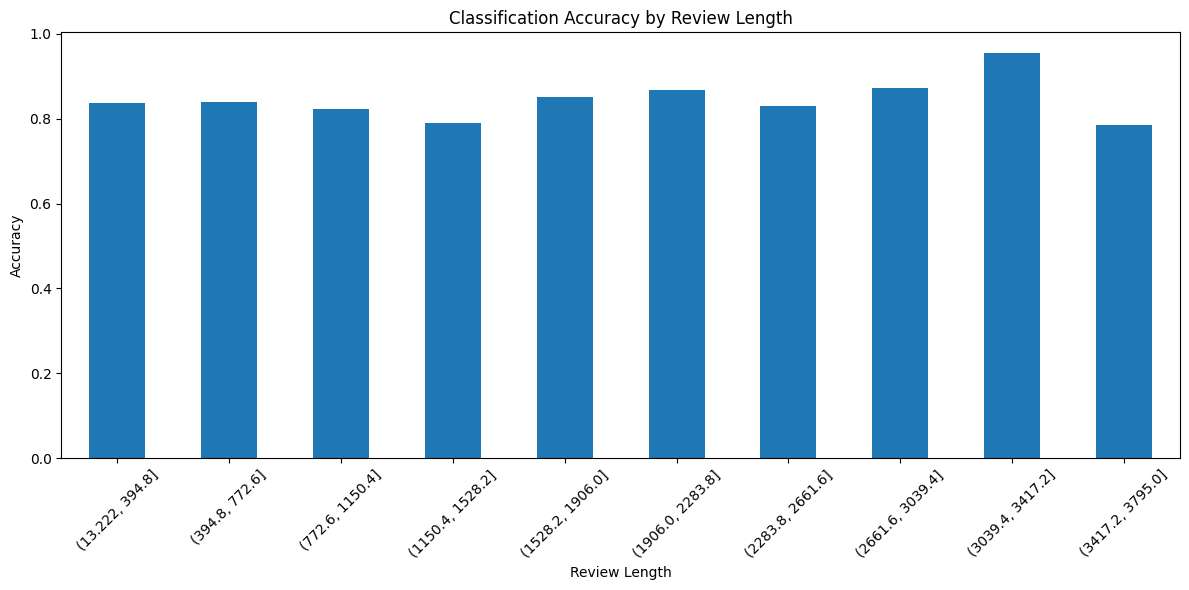

In [ ]:


df['review_length'] = df['cleaned_review'].apply(len)

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['sentiment'], test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy: {accuracy:.2f}")

df_test = df.iloc[y_test.index]
df_test['predicted'] = y_pred
df_test['correct'] = df_test['sentiment'] == df_test['predicted']

length_bins = pd.cut(df_test['review_length'], bins=10)
accuracy_by_length = df_test.groupby(length_bins)['correct'].mean()

plt.figure(figsize=(12, 6))
accuracy_by_length.plot(kind='bar')
plt.title('Classification Accuracy by Review Length')
plt.xlabel('Review Length')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
def get_opening_closing(text, n_words=10):
    words = text.split()
    opening = ' '.join(words[:n_words])
    closing = ' '.join(words[-n_words:])
    return opening, closing

df['opening'] = df['cleaned_review'].apply(lambda x: get_opening_closing(x)[0])
df['closing'] = df['cleaned_review'].apply(lambda x: get_opening_closing(x)[1])

print("Most common opening words in positive reviews:")
print(Counter(' '.join(df[df['sentiment'] == 'positive']['opening']).split()).most_common(10))

print("\nMost common opening words in negative reviews:")
print(Counter(' '.join(df[df['sentiment'] == 'negative']['opening']).split()).most_common(10))

print("\nMost common closing words in positive reviews:")
print(Counter(' '.join(df[df['sentiment'] == 'positive']['closing']).split()).most_common(10))

print("\nMost common closing words in negative reviews:")
print(Counter(' '.join(df[df['sentiment'] == 'negative']['closing']).split()).most_common(10))


Most common opening words in positive reviews:
[('movi', 8564), ('film', 7061), ('one', 3543), ('watch', 2060), ('first', 1913), ('like', 1853), ('time', 1818), ('love', 1643), ('great', 1625), ('good', 1494)]

Most common opening words in negative reviews:
[('movi', 10535), ('film', 6091), ('one', 3165), ('watch', 2367), ('like', 2078), ('bad', 1960), ('first', 1615), ('good', 1591), ('seen', 1536), ('see', 1431)]

Most common closing words in positive reviews:
[('movi', 5988), ('film', 5456), ('one', 2939), ('see', 2872), ('watch', 2404), ('good', 2211), ('like', 2152), ('great', 1904), ('time', 1754), ('recommend', 1613)]

Most common closing words in negative reviews:
[('movi', 7195), ('film', 4714), ('one', 2885), ('watch', 2823), ('like', 2262), ('time', 2225), ('see', 1889), ('good', 1876), ('bad', 1822), ('make', 1712)]


In [ ]:
df.loc[df["sentiment"] == 'positive', "sentiment"] = 1
df.loc[df["sentiment"] == 'negative', "sentiment"] = 0

In [ ]:
X = df['cleaned_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print("Train Data size:", len(X_train), len(y_train))
print("Test Data size", len(X_test), len(y_test))

Train Data size: 40000 40000
Test Data size 10000 10000


In [ ]:
y

,sentiment
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
max_len = 200
batch_size=512

In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
vocabulary_size = len(tokenizer.word_index)
vocabulary_size

62891

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=128))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [ ]:
X_train = np.where(X_train >= vocabulary_size, vocabulary_size - 1, X_train)
X_test = np.where(X_test >= vocabulary_size, vocabulary_size - 1, X_test)


In [ ]:
history=model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),batch_size=batch_size)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.5228 - loss: 0.6927 - val_accuracy: 0.6403 - val_loss: 0.6893
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.6630 - loss: 0.6693 - val_accuracy: 0.8217 - val_loss: 0.4672
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.8371 - loss: 0.4367 - val_accuracy: 0.8602 - val_loss: 0.3358
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.8759 - loss: 0.3320 - val_accuracy: 0.8695 - val_loss: 0.3094
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.8930 - loss: 0.2858 - val_accuracy: 0.8762 - val_loss: 0.2918
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.9072 - loss: 0.2514 - val_accuracy: 0.8813 - val_loss: 0.2838
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.9218 - loss: 0.2218 - val_accuracy: 0.8823 - val_loss: 0.2841
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.9296 - loss: 0.2024 - val_accuracy: 0.8847 - v

In [ ]:
model. save (' /kaggle/working/ibm.h5')

In [ ]:
model_2 = Sequential()
model_2.add(Embedding(input_dim=vocabulary_size, output_dim=128, input_length=X_train.shape[1]))
model_2.add(Bidirectional(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2)))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])




In [ ]:
model_2. save (' /kaggle/working/ibm.h5')

In [86]:
from tensorflow.keras.layers import GRU
model_3 = Sequential()
model_3.add(Embedding(input_dim=vocabulary_size, output_dim=128, input_length=X_train.shape[1]))
model_3.add(GRU(units=128, dropout=0.2, recurrent_dropout=0.2))
model_3.add(Dropout(0.5))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model_3. save (' /kaggle/working/ibm.h5')

In [ ]:
!pip install mlflow


In [ ]:
import mlflow
import mlflow.keras
import mlflow.sklearn

# Set MLflow to use the default local tracking server
mlflow.set_tracking_uri("https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow")  # This creates an 'mlruns' directory in the current working directory

# Create or set the experiment
mlflow.set_experiment("IMDB Models")

import os
os.environ['MLFLOW_TRACKING_USERNAME'] = 'asamy4194' # 'learnpythonlanguage'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '951cd23d2b7cec538703bd36d2e2fbef6a209ec8' #
os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow' # https://dagshub.com/learnpythonlanguage/mlflow_dagshub_demo.mlflow

In [ ]:
import mlflow
import mlflow.keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout, Bidirectional, GRU
from tensorflow.keras.models import Sequential

In [87]:
def log_model_to_mlflow(model, X_train, y_train, X_test, y_test, batch_size, epochs, model_name):
    # Start a new MLflow run
    with mlflow.start_run(run_name="GRU_sequentail"):
        # Log hyperparameters
        mlflow.log_param("vocabulary_size", vocabulary_size)
        mlflow.log_param("batch_size", batch_size)
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("learning_rate", 0.0001)

        # Train the model and get the history
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=batch_size)

        # Log metrics
        final_accuracy = history.history['accuracy'][-1]
        final_val_accuracy = history.history['val_accuracy'][-1]
        final_loss = history.history['loss'][-1]
        final_val_loss = history.history['val_loss'][-1]

        mlflow.log_metric("final_accuracy", final_accuracy)
        mlflow.log_metric("final_val_accuracy", final_val_accuracy)
        mlflow.log_metric("final_loss", final_loss)
        mlflow.log_metric("final_val_loss", final_val_loss)



In [89]:
history = log_model_to_mlflow(model_3, X_train, y_train, X_test, y_test, batch_size=batch_size, epochs=10, model_name="GRU_sequentail")

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.5144 - loss: 0.6927 - val_accuracy: 0.5855 - val_loss: 0.6906
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.5911 - loss: 0.6869 - val_accuracy: 0.7061 - val_loss: 0.6575
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.7699 - loss: 0.5843 - val_accuracy: 0.7447 - val_loss: 0.5728
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.8195 - loss: 0.4490 - val_accuracy: 0.7573 - val_loss: 0.5168
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.8466 - loss: 0.3814 - val_accuracy: 0.7535 - val_loss: 0.5092
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.8535 - loss: 0.3588 - val_accuracy: 0.7613 - val_loss: 0.4902
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.8787 - loss: 0.3090 - val_accuracy: 0.7679 - val_loss: 0.4802
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.8925 - loss: 0.2808 - val_accuracy: 0.7703 - v

2024/10/17 14:25:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run GRU_sequentail at: https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow/#/experiments/1/runs/2801953829e2438ca9099412a8002bb3.
2024/10/17 14:25:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow/#/experiments/1.
